In [62]:
# importing Libraries

import pandas as pd
import csv
import mysql.connector as connection

In [69]:
# Reading RAW DATA

data_list = []
with open('carbon_nanotubes.csv','r') as file:
    data = csv.reader(file,delimiter='\n')
    print([i[0].split(';') for i in data][0])
    for i in data:
        #print(i)
        print(i[0].split(';'))
        data_list.append(i[0].split(';'))
    

['Chiral indice n', 'Chiral indice m', 'Initial atomic coordinate u', 'Initial atomic coordinate v', 'Initial atomic coordinate w', "Calculated atomic coordinates u'", "Calculated atomic coordinates v'", "Calculated atomic coordinates w'"]


In [59]:
# writing data into csv file
with open('carbon_nanotubes_updated.csv','w',newline='') as data:
    w = csv.writer(data)
    w.writerows(data_list)

In [89]:
# Creating new Table inside Database db01

mydb = connection.connect(host="localhost" , user="root" , passwd="1234" , database="db01" , use_pure=True)
print(mydb.is_connected())
cursor = mydb.cursor()
cursor.execute("CREATE TABLE Carbon_Nanotubes2(Chiral_indice_n int(30) , Chiral_indice_m int(30) , Initial_atomic_coordinate_u varchar(30) , \
               Initial_atomic_coordinate_v varchar(30) ,Initial_atomic_coordinate_w varchar(30),Calculated_atomic_coordinates_u varchar(30) , Calculated_atomic_coordinates_v varchar(30) , \
               Calculated_atomic_coordinates_w varchar(30))")



True


In [76]:
cursor = mydb.cursor()

In [90]:
with open('carbon_nanotubes_updated.csv' , 'r') as file:
    next(file)
    data=csv.reader(file , delimiter='\n')
    for i in data:
        #print(i[0])
        cursor.execute('insert into carbon_nanotubes2 values({data})'.format(data=(str(i[0]))))
    print("DATA INSERTED")
mydb.commit()
mydb.close()

DATA INSERTED


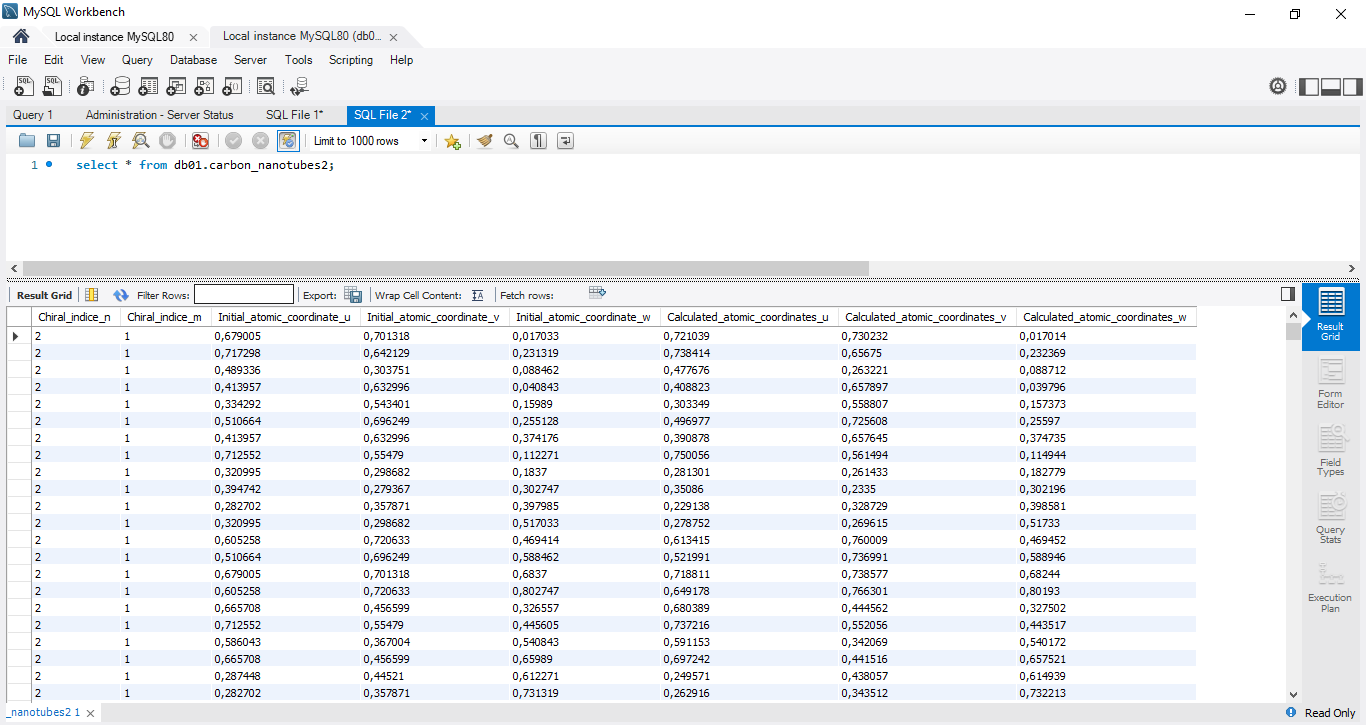